<a href="https://colab.research.google.com/github/ttatjanaa/ttatjanaa/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%A2%D0%B0%D1%80%D0%B0%D1%81%D0%BE%D0%B2%D0%BE%D0%B9_%D0%A2_%D0%90_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дипломная работа на тему "Анализ и прогнозирование временного ряда на основе данных о продажах акций компании "Coca-cola" с 19 января 1962 года по 19 декабря 2021 года 
Введение. Постановка целей и задач.

**Часть1.** 

**Импорт библиотек, ознакомление с данными.**
**Импорт Датафрейма, библиотек, написание функций.**

In [ ]:
## Загружаем pmdarima
!pip install pmdarima

In [ ]:
## Загружаем fbprophet
!pip install fbprophet

In [ ]:
## Импортируем библиотеки и функции 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
## Импорт моделей 
from statsmodels.tsa.statespace.sarimax import SARIMAX      # для модели SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from fbprophet import Prophet                                # для модели Профет
from statsmodels.tsa.holtwinters import ExponentialSmoothing # для модели Экспоненцальное сглаживание

In [ ]:
##from pmdarima import auto_arima                              # для поиска ARIMA моделей (подбирает оптимальные параметры для модели)

In [ ]:
## Метрики
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
## Здесь импортируем данные с компьютера для работы в колаб
from google.colab import files
uploaded = files.upload()

Saving COCO COLA.csv to COCO COLA.csv


In [ ]:
df = pd.read_csv('COCO COLA.csv', index_col='Date',parse_dates=True)
##data ={'Column 1'   :[1., 2., 3., 4., 5., 6.],
##       'Index Title':["Open", "High", "Low", "Close", "Adj Close", "Volume"]}
##df = pd.DataFrame (data)
## Проверим загруженные данные
##df.head

In [ ]:
df.head

<bound method NDFrame.head of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.263021   0.270182   0.263021   0.263021   0.051133    806400
1962-01-03   0.259115   0.259115   0.253255   0.257161   0.049994   1574400
1962-01-04   0.257813   0.261068   0.257813   0.259115   0.050374    844800
1962-01-05   0.259115   0.262370   0.252604   0.253255   0.049234   1420800
1962-01-08   0.251302   0.251302   0.245768   0.250651   0.048728   2035200
...               ...        ...        ...        ...        ...       ...
2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998  31362800
2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999  24806600
2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001  24923800
2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002  24696900
2021-12-17  58.490002  58.919998  57.700001  57.730000  57

In [ ]:
## Количество строк в нашем датасете
print(len(df))

15096


In [ ]:
## Проверим общую информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [ ]:
## Проверим датафрейм на наличие пропусков
print(df.isna().any(axis=None))

False


In [ ]:
## Проверим, везде ли отсутствуют пропуски
df_check = df.isna()

for i in df_check.columns:
    print(f'Для признака {i} пропуски: ', df_check[i].unique())

Для признака Open пропуски:  [False]
Для признака High пропуски:  [False]
Для признака Low пропуски:  [False]
Для признака Close пропуски:  [False]
Для признака Adj Close пропуски:  [False]
Для признака Volume пропуски:  [False]


In [ ]:
## Можем заменить на 0, чтобы не прерывать временной ряд
df_new = df.fillna(0)

In [ ]:
## Проверим тип данных
df_new.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

**Вывод по части 1: Были загружены необходимые библиотеки, функции, модели, метрики. Был загружен датасет. Датасет был рассмотрен на предмет того, что с ним можно работать: что отсутствуют пропуски, проверен формат данных и дата находится в порядке возрастания.**

**Часть 2.**

**Знакомство с данными.**

Этот блок посвящен первоначальному знакомству с данными

Наша задача - посмотреть на данные методами .info(), а также изучить их визуально.

Возможные метрики для прогнозирования:

1) Open - это цена, по которой финансовая ценная бумага открывается на рынке, когда начинается торговля

2) High - максимум-это самая высокая цена, по которой акции торгуются в течение периода.

3) Low - минимальная цена акции за период.

4) Adj Close - скорректированная цена закрытия изменяет цену закрытия акции, чтобы отразить стоимость этой акции

5) Close - цена закрытия обычно относится к последней цене, по которой акции торгуются во время обычной торговой сессии

In [ ]:
## Смотрим общую информацию о датасете
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [ ]:
## Смотрим список аналитической информации и выбираем себе необходимую для изучения
df_new.head

<bound method NDFrame.head of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.263021   0.270182   0.263021   0.263021   0.051133    806400
1962-01-03   0.259115   0.259115   0.253255   0.257161   0.049994   1574400
1962-01-04   0.257813   0.261068   0.257813   0.259115   0.050374    844800
1962-01-05   0.259115   0.262370   0.252604   0.253255   0.049234   1420800
1962-01-08   0.251302   0.251302   0.245768   0.250651   0.048728   2035200
...               ...        ...        ...        ...        ...       ...
2021-12-13  56.980000  57.930000  56.959999  57.759998  57.759998  31362800
2021-12-14  57.400002  58.169998  57.400002  57.799999  57.799999  24806600
2021-12-15  57.930000  58.250000  57.650002  58.060001  58.060001  24923800
2021-12-16  57.980000  58.880001  57.900002  58.650002  58.650002  24696900
2021-12-17  58.490002  58.919998  57.700001  57.730000  57

**Вывод по части 2: Выбираем необходимые для анализа столбцы: Date, Volume**

**Часть 3.**

**Предобработка данных.Фильтрация данных.**

Фильтрую по условию, выбирая признаки по порядку: дата, объем акций.

In [ ]:
df_new = df[['Volume']]

In [ ]:
## Проверяем
df_new.head()

,Volume
Date,
1962-01-02,806400
1962-01-03,1574400
1962-01-04,844800
1962-01-05,1420800
1962-01-08,2035200


*Необходимо для Volume и Date поменять тип данных для корректного считывания и отображения.*

In [ ]:
df_new['Volume'] = df_new['Volume'].astype('string')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## Проверим тип данных
df_new.dtypes

Volume    string
dtype: object

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Volume  15096 non-null  string
dtypes: string(1)
memory usage: 235.9 KB


**Часть 4**

**EDA (exploratory data analysis) или разведочный анализ данных.**

Цель данного блока: познакомиться "поближе" с данными, которыми мы располагаем.

Задачи данного блока:

Вывести статистику по нужным столбцам;

Построить графическое отображение столбцов.

In [ ]:
## Входная выборка для анализа
df_new.head()

,Volume
Date,
1962-01-02,806400
1962-01-03,1574400
1962-01-04,844800
1962-01-05,1420800
1962-01-08,2035200


In [ ]:
## Проведем расчет основных статистических метрик
df_new.describe()

,Volume
count,15096
unique,10188
top,537600
freq,65


In [ ]:
## Замена значений N/A значением 0
df_new = df.fillna(0)

In [ ]:
## Проведем расчет основных статистических метрик
df_new.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


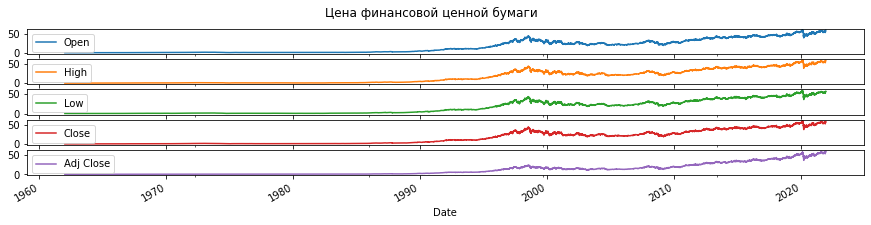

In [ ]:
## Построим общий график для метрик
df_new[['Open','High','Low','Close','Adj Close']].plot(subplots=True, figsize=(15, 3), title = 'Цена финансовой ценной бумаги');


Промежуточный вывод:

Средняя цена акции практически одинакова, заметное повышение цены наблюдается по данным из графика 'Open', т.е. на время открытия биржи, значительное снижение цены наблюдается по данным из графика 'Adj Close'.


[Text(0, 0.5, 'Объем'), Text(0.5, 0, '')]

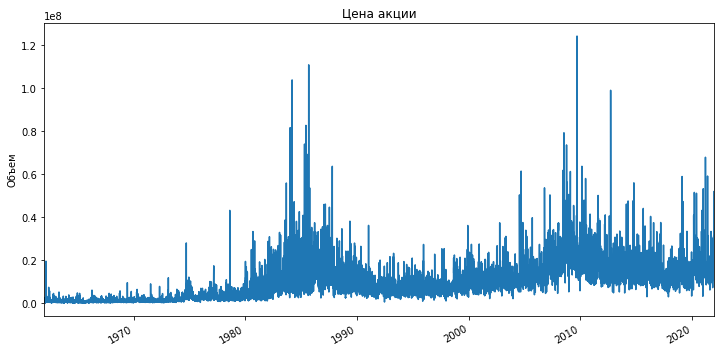

In [ ]:
## Cтроим временной ряд по колонке 'Объем' из загруженного датасета

title = 'Цена акции' # название графика
ylabel = 'Объем' # название оси Y
xlabel = '' # по сравнению с ожидаемым результатом не указываем название оси Х

df1 = df_new.resample('W').mean()
ax = df_new['Volume'].plot(figsize=(12,6),title=title) # добавлем заголовок
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

Промежуточный вывод: Видим уровень корреляции, между ценой продажи акции в течении одного дня. Также выявлен положительный тренд потребления электроэнергии. Строим гипотезу: будет ли в будущем расти цена акции с учетом появления новых продукции Coca-cola и работы на дому с учетом сезонности.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bc3d13850>,
      dtype=object)

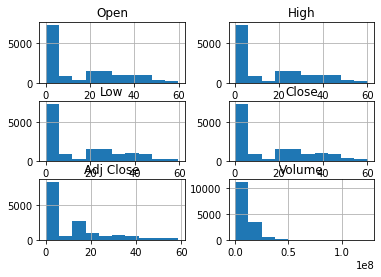

In [ ]:
## Построим гистограмму для определения распределения данных
df_new.hist()

Промежуточный вывод:

Анализ представленного распределения позволяет сделать вывод о пиковых временных отрезках при продаже акций. Это видно на общем графике: 4 пиковых точки продажи. В остальное время продажи осуществляются с более сглаженными всплесками роста.

In [ ]:
## Построим матрицу корреляции признаков
df_new.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999938,0.999929,0.999883,0.971996,0.472328
High,0.999938,1.000000,0.999899,0.999942,0.971578,0.473719
Low,0.999929,0.999899,1.000000,0.999939,0.972530,0.470407
Close,0.999883,0.999942,0.999939,1.000000,0.972004,0.471971
Adj Close,0.971996,0.971578,0.972530,0.972004,1.000000,0.452271
Volume,0.472328,0.473719,0.470407,0.471971,0.452271,1.000000


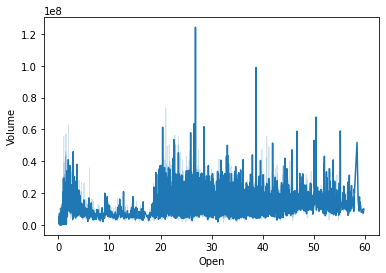

In [ ]:
## Построим график зависимости Open от Volume
sns.lineplot(data = df_new, x = 'Open', y = 'Volume')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


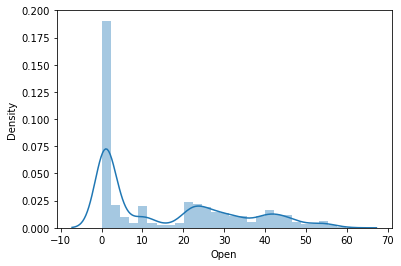

In [ ]:
## График плотности распределения Open
sns.distplot(df_new.Open)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


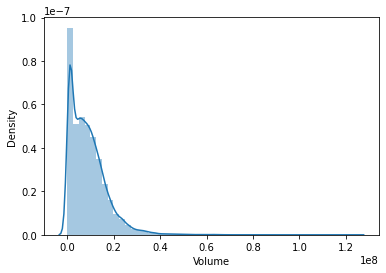

In [ ]:
# график плотности распределения Volume
sns.distplot(df_new.Volume)

Промежуточный вывод:

Видим, что величины коэффициентов корреляции у цены акции на время открытия биржи и объемом продажи равны 0, что свидетельствует о том, что переменные не связаны между собой.

Также на графиках KDE видно, что графики распределения отличаются, благодаря этому наблюдению можно сформулировать гипотезу исследования:

Если цена акции снижается, то общий объем продаж остается прежним. 

Для этого построим прогнозную модель расчёта.

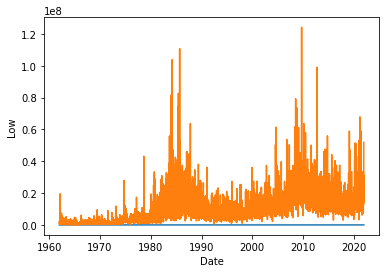

In [ ]:
## При снижении цены акции при открытии биржи объем продаж не увеличивается и остается прежним
sns.lineplot(data = df_new, x = 'Date', y = 'Low')
sns.lineplot(data = df_new, x = 'Date', y = 'Volume')

**Часть 5**

**Построение моделей, анализ результатов**.

In [ ]:
## Выделяем выборки, где тестовая размером 1 месяц (20 рабочих дней, время работы биржи в месяц)
train = df.iloc[:len(df)-20]
test = df.iloc[len(df)-20:]

In [ ]:
## Посмотрим на обучающую выборку
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [ ]:
## Посмотрим на тестовую выборку
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-19,55.439999,55.490002,54.900002,55.130001,54.705769,15813700
2021-11-22,55.099998,56.020000,55.080002,55.470001,55.043152,16905600
2021-11-23,55.660000,56.110001,55.500000,55.880001,55.449997,13835900
2021-11-24,55.709999,55.840000,55.029999,55.430000,55.003460,12598900
2021-11-26,54.590000,54.750000,53.580002,53.730000,53.316540,14754300


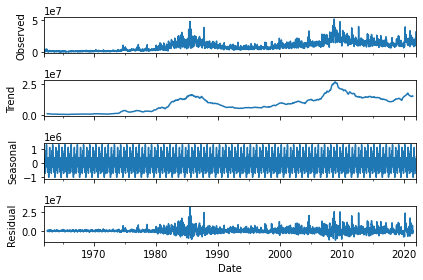

In [ ]:
## Строим декомпозицию временного ряда (ETS декомпозиция)
r = seasonal_decompose(df1['Volume'], model='additive')
r.plot();

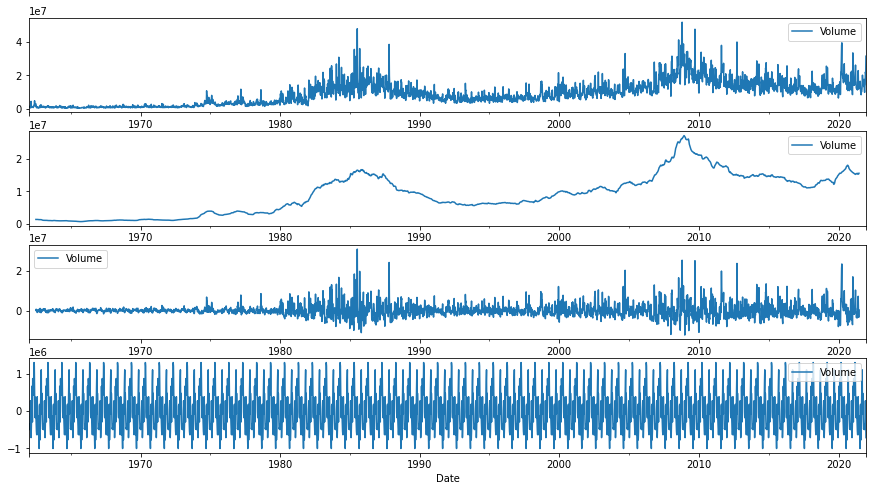

In [ ]:
## seasonal_decompose в увеличенном виде
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
r.observed.plot(ax=ax1, legend=True)
r.trend.plot(ax=ax2, legend=True)
r.resid.plot(ax=ax3, legend=True)
r.seasonal.plot(ax=ax4, legend=True)

Промежуточный вывод:

На последнем графике наблюдаем цикличные сезонные колебания на протяжении всего периода анализа объема продаж.

**Построение моделей.**
**Задачи:**

описать модель

подобрать оптимальные параметры

создать модель

обучить модель

сделать прогноз на период тестовой выборки

сравнить прогноз с тестовой выборкой (построить график)

оценить качество прогноза

сделать прогноз на 10-15 дней на будущее

сделать выводы о работе данного метода прогнозирования


### 2й метод прогнозирования - PROPHET

In [ ]:
# подготовим данные для модели
train_prophet = train[['Volume']]
test_prophet = test[['Volume']]

In [ ]:
#посмотрим на обущающую выборку
train_prophet.head()

,Volume
Date,
1962-01-02,806400
1962-01-03,1574400
1962-01-04,844800
1962-01-05,1420800
1962-01-08,2035200


In [ ]:
#посмотрим на тестовую выборку
test_prophet.head()

,Volume
Date,
2021-11-19,15813700
2021-11-22,16905600
2021-11-23,13835900
2021-11-24,12598900
2021-11-26,14754300


In [ ]:
train_prophet = train.reset_index() #Индекс сбросим, чтобы работать только с колонками.
test_prophet = test.reset_index() #Индекс сбросим, чтобы работать только с колонками.

In [ ]:
train_prophet.head() #посмотрим преобразование после сброса индексов

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [ ]:
test_prophet.head() #посмотрим преобразование после сброса индексов

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-19,55.439999,55.490002,54.900002,55.130001,54.705769,15813700
1,2021-11-22,55.099998,56.020000,55.080002,55.470001,55.043152,16905600
2,2021-11-23,55.660000,56.110001,55.500000,55.880001,55.449997,13835900
3,2021-11-24,55.709999,55.840000,55.029999,55.430000,55.003460,12598900
4,2021-11-26,54.590000,54.750000,53.580002,53.730000,53.316540,14754300


In [ ]:
train_prophet_0_new = train_prophet[['Date','Volume']]
test_prophet_0_new = test_prophet[['Date','Volume']]

In [ ]:
train_prophet_0_new.head()

,Date,Volume
0,1962-01-02,806400
1,1962-01-03,1574400
2,1962-01-04,844800
3,1962-01-05,1420800
4,1962-01-08,2035200


In [ ]:
test_prophet_0_new.head()

,Date,Volume
0,2021-11-19,15813700
1,2021-11-22,16905600
2,2021-11-23,13835900
3,2021-11-24,12598900
4,2021-11-26,14754300


In [ ]:
# Переименуем столбцы в обучающем и тестовом датасетах, чтобы они подходили для использования методов Prophet
train_prophet_0_new.columns = ['ds', 'y'] # переименовали столбцы
test_prophet_0_new.columns = ['ds', 'y'] # переименовали столбцы

In [ ]:
train_prophet_0_new.head()

,ds,y
0,1962-01-02,806400
1,1962-01-03,1574400
2,1962-01-04,844800
3,1962-01-05,1420800
4,1962-01-08,2035200


In [ ]:
test_prophet_0_new.head()

,ds,y
0,2021-11-19,15813700
1,2021-11-22,16905600
2,2021-11-23,13835900
3,2021-11-24,12598900
4,2021-11-26,14754300


In [ ]:
model = Prophet()
model.fit(train_prophet_0_new) # подогнали модель под наши данные

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Промежуточные выводы:

Алгоритм проигнорировал, выбирая параметры

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.

годовую сезонность (для годовой сезонности нам нужно иметь данные минимум за 2 года, чтобы суметь использовать ее в модели)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.

дневную сезонность (дневная сезонность может использоваться в случае, если данные собираются по часам/минутам, в нашем случае данные представлены по месяцам).
Зато он обнаружил недельную сезонность и использовал его при настройке модели.



In [ ]:
# говорим профету сделать дата-фрейм на 15 дней вперед
future = model.make_future_dataframe(periods=15, freq='W') 
future.tail() # выводим 5 строк с конца

,ds
15086,2022-01-30
15087,2022-02-06
15088,2022-02-13
15089,2022-02-20
15090,2022-02-27


In [ ]:
# предсказываем значения по модели, доверительный интервал по умолчанию 95%
forecast = model.predict(future)
forecast.head() # возвращает много колонок

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-02,972065.160830,-6.276535e+06,6.567038e+06,972065.160830,972065.160830,-1.186212e+06,-1.186212e+06,-1.186212e+06,78780.969132,78780.969132,78780.969132,-1.264993e+06,-1.264993e+06,-1.264993e+06,0.0,0.0,0.0,-214147.240294
1,1962-01-03,972052.898636,-6.620535e+06,6.808263e+06,972052.898636,972052.898636,-1.124165e+06,-1.124165e+06,-1.124165e+06,68356.012078,68356.012078,68356.012078,-1.192521e+06,-1.192521e+06,-1.192521e+06,0.0,0.0,0.0,-152112.396150
2,1962-01-04,972040.636443,-7.051706e+06,6.258448e+06,972040.636443,972040.636443,-9.133634e+05,-9.133634e+05,-9.133634e+05,193952.471298,193952.471298,193952.471298,-1.107316e+06,-1.107316e+06,-1.107316e+06,0.0,0.0,0.0,58677.206838
3,1962-01-05,972028.374249,-5.918402e+06,6.878686e+06,972028.374249,972028.374249,-5.320355e+05,-5.320355e+05,-5.320355e+05,478684.309424,478684.309424,478684.309424,-1.010720e+06,-1.010720e+06,-1.010720e+06,0.0,0.0,0.0,439992.838692
4,1962-01-08,971991.587667,-6.807430e+06,6.455872e+06,971991.587667,971991.587667,-1.320072e+06,-1.320072e+06,-1.320072e+06,-651955.594826,-651955.594826,-651955.594826,-6.681164e+05,-6.681164e+05,-6.681164e+05,0.0,0.0,0.0,-348080.380948


Основные поля в прогнозе следующие:

ds — дата прогноза

yhat — спрогнозированное значение

yhat_lower — нижняя граница доверительного интервала для прогноза

yhat_upper — верхняя граница доверительного интервала для прогноза

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # оставим только нужные

,ds,yhat,yhat_lower,yhat_upper
15086,2022-01-30,1.221374e+07,5.450933e+06,1.875159e+07
15087,2022-02-06,1.177093e+07,5.052111e+06,1.818367e+07
15088,2022-02-13,1.148307e+07,5.457614e+06,1.791894e+07
15089,2022-02-20,1.171377e+07,4.942068e+06,1.807594e+07
15090,2022-02-27,1.239107e+07,5.786342e+06,1.912836e+07


сравниваем прогноз и тестовую выборку, где черные точки - выборка

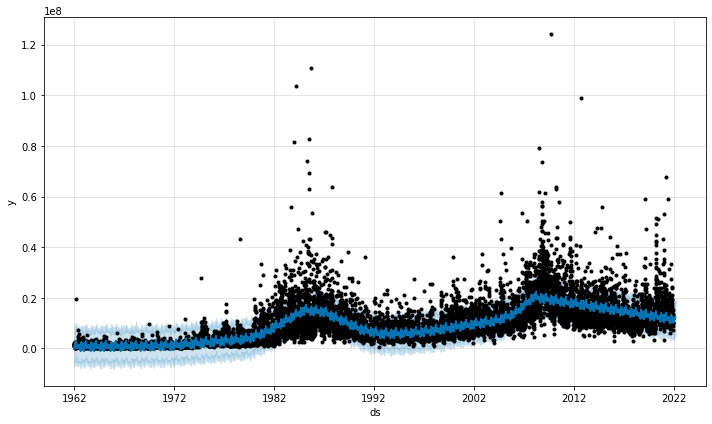

In [ ]:
model.plot(forecast);

Кроме того, Prophet позволяет также наглядно разложить ряд на основные компоненты — тренд и сезонность:

plot_components() — возвращает несколько графиков, среди которых тренд и столько сезонностей, сколько он найдет.

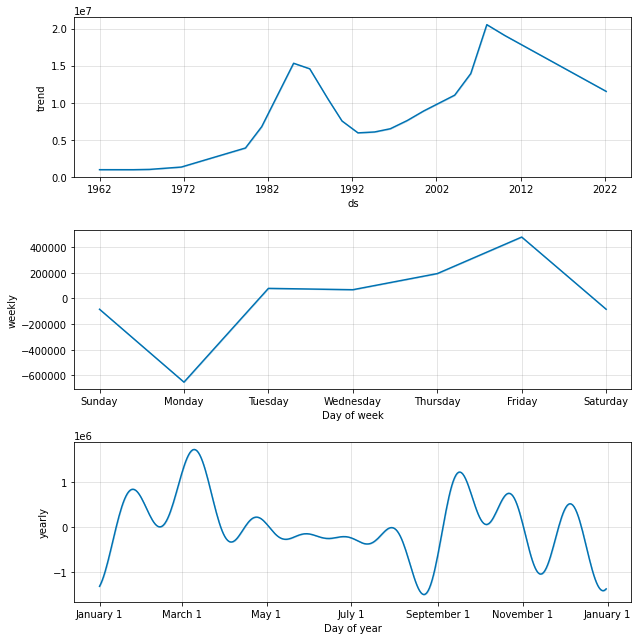

In [ ]:
model.plot_components(forecast);

Промежуточные выводы: Видим, наличие возрастающего тренда стоимости акций и годовую сезонность. Видим каким образом изменяются цены по месяцам.

In [ ]:
#оцениваем качество модели методом MSE, RMSE, MAE, MAPE

mae_error = mean_absolute_error(test_prophet_0_new['y'], forecast['yhat'].tail(15))
mse_error = mean_squared_error(test_prophet_0_new['y'], forecast['yhat'].tail(52))
rmse_error = rmse(test_prophet_0_new['y'], forecast['yhat'].tail(52))
mape_error = np.mean(np.abs(forecast['yhat'] - test_prophet_0_new['y'])/test_prophet_0_new['y'])*100

print(f'Prophet MAE Error: {mae_error:11.10}')
print(f'Prophet MSE Error: {mse_error:11.10}')
print(f'Prophet RMSE Error: {rmse_error:11.10}')
print(f'Prophet MAPE Error: {mape_error:11.10}')

In [ ]:
# делаем прогноз на будущее - 1 год вперед

# обучаем модель на всем датасете
fut_model_prophet = Prophet(seasonality_mode='multiplicative')
fut_model_prophet.fit(df1)

# говорим профету сделать дата-фрейм на 1 год вперед
fut_future_prophet = fut_model_prophet.make_future_dataframe(periods=52)
fut_fcast_prophet = fut_model_prophet.predict(fut_future_prophet)

In [ ]:
# устанавливаем индекс
fut_fcast_prophet.index = fut_fcast_prophet.ds

In [ ]:
# убедимся в изменениях
fut_fcast_prophet.head()

NameError: ignored

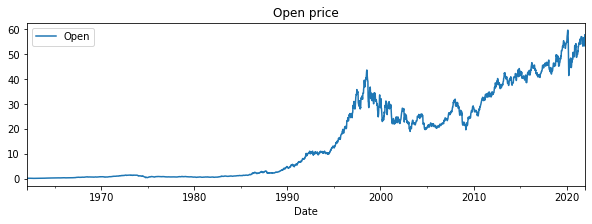

In [ ]:
#строим график на будущее

ax = df1['Open'].plot(legend=True, figsize=(10,3),title='Open price') 
fut_fcast_prophet['yhat'].tail(12).plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.legend(["Open", "PROPHET"]);C

**3й метод прогнозирования "Экспоненциальное сглаживание" (Exponential smoothing)**

Описание модели Exponential smoothing: to do

Экспоненциальное сглаживание — метод математического преобразования, используемый при прогнозировании временных рядов.

Метод также известен как метод простого экспоненциального сглаживания, или метод Брауна

In [ ]:
# создаем модель с подобранными параметрами
model_exps = ExponentialSmoothing (train['Volume'], seasonal_periods=7, trend = 'add')# годовая сезонность

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.


In [ ]:
#обучаем модель на обучающей выборке данных
model_exps.fit()

In [ ]:
#посмотрим на подобранные параметры модели
model_exps.params

{'damping_slope': nan,
 'initial_level': 806400.0,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 767999.9999999998,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.2918169471796316,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.003272306024537332,
 'use_boxcox': False}

In [ ]:
import pandas as pd

In [ ]:
#предсказываем значения,передав модели results точку начала и окончания
prediction_exps = model_exps.predict(model_exps.params, start=test.index[0], end=test.index[-1])

In [ ]:
test.index[0]

Timestamp('2021-11-19 00:00:00')

In [ ]:
test.index[-1]

Timestamp('2021-12-17 00:00:00')

In [ ]:
prediction_exps

In [ ]:
#преобразуем в датафрейм с индексами
prediction_exps = pd.DataFrame(prediction_exps)
prediction_exps.index = pd.date_range("2021-12-10 00:00:00", periods=10, freq="D")

prediction_exps.columns = ['prediction_exps']

In [ ]:
#проверим
prediction_exps.head()

In [ ]:
#сравниваем прогноз и тестовую выборку
ax = test['Volume'].plot(legend=True, figsize=(12,6),title='Объем продаж')
prediction_exps['prediction_exps'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
#проверим
prediction_exps.head()

In [ ]:
#сравниваем прогноз и тестовую выборку
ax = test.plot(legend=True, figsize=(12,6),title='Объем продаж')
prediction_exps['prediction_exps'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
#оцениваем качество модели методом MSE, RMSE, MAE, MAPE
mae_error = mean_absolute_error(test, prediction_exps['prediction_exps'])
mse_error = mean_squared_error(test, prediction_exps['prediction_exps'])
rmse_error = rmse(test, prediction_exps['prediction_exps'])
mape_error = np.mean(np.abs(prediction_exps['prediction_exps'] - test)/test)*100

print(f'Exponential smoothing MAE Error: {mae_error:11.10}')
print(f'Exponential smoothing MSE Error: {mse_error:11.10}')
print(f'Exponential smoothing RMSE Error: {rmse_error:11.10}')
print(f'Exponential smoothing MAPE Error: {mape_error:11.10}')

In [ ]:
#делаем прогноз на будущее

# обучаем модель на всем датасете
fut_model_exps = ExponentialSmoothing(df1['Open'], seasonal_periods=12, trend = 'add')
fut_model_exps.fit()

#задаем точки будущего
fut_fcast_exps = fut_model_exps.predict(fut_model_exps.params, start=len(df1)-1, end=len(df1)+10)

#преобразуем в датафрейм с индексами
fut_fcast_exps = pd.DataFrame(fut_fcast_exps)
fut_fcast_exps.index = pd.date_range('2020-02-09 00:00:00', periods=12, freq="W-SUN")
fut_fcast_exps.columns = ['fut_fcast_exps']
#проверим
fut_fcast_exps.head()

,fut_fcast_exps
2020-02-09,54.908381
2020-02-16,57.774382
2020-02-23,57.792763
2020-03-01,57.811144
2020-03-08,57.829525


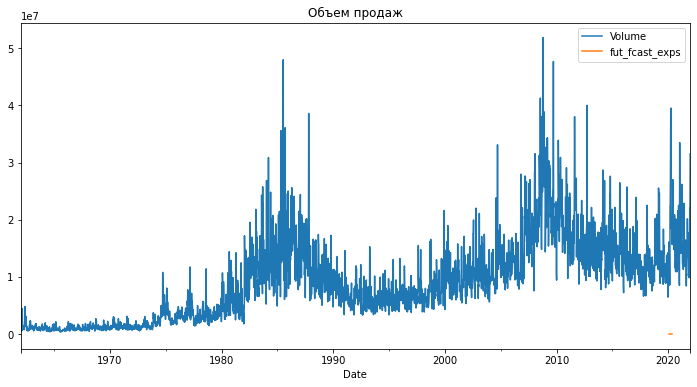

In [ ]:
#строим график на будущее
ax = df1['Volume'].plot(legend=True, figsize=(12,6),title='Объем продаж') 
fut_fcast_exps['fut_fcast_exps'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

Выводы
Проведен анализ данных с использованием современных методов обработки статистической информации.

Рассчитаны основные статистические метрики, позволяющие судить о характере исследуемого явления.

Результаты анализа представленных данных помогли выявить зависимость цены акции на мрмент открытия от объема продаж.

Прогнозная модель позволила зафиксировать что снижение цены имеет слабое влияние на объем продажи акций.